In [1]:
#kaggle competitions download -c dogs-vs-cats-redux-kernels-edition
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

100% 813M/814M [00:28<00:00, 23.6MB/s]
100% 814M/814M [00:28<00:00, 29.8MB/s]


In [2]:
# 파일 이름 dogs-vs-cats-redux-kernels-edition.zip
# 압축풀기
!unzip -q dogs-vs-cats-redux-kernels-edition.zip -d .

In [3]:
!unzip -q train.zip -d .

### dog.12480.jpg
### cat.6883.jpg

In [4]:
# 이미지 갯수 알아보기

print(len(os.listdir('/content/train/') ) )

25000


### 이미지를 숫자로 변화 시키기
dataset/cat/고양이 파일
dataset/dog/강아지 파일

In [5]:
import os

# 개 고양이 폴더 나눠주기
os.mkdir('/content/dataset')
os.mkdir('/content/dataset/cat')
os.mkdir('/content/dataset/dog')


In [6]:
# 파일 이름이 'cat'이름 있으면 cat 폴더로 복사해 주세요
# 파일 이름이 'dog'이름 있으면 dog 폴더로 복사해 주세요
# dog.12480.jpg / cat.6883.jpg
import shutil

for i in os.listdir('/content/train/'):
    # i = cat.12480.jpg
    if 'cat' in i:
      # 저기로 옮겨주세요
      # (어떤파일을 ,어떤경로로)
      # '/content/train/' + i => /content/train/ cat.12480.jpg
      shutil.copyfile('/content/train/' + i, '/content/dataset/cat/' + i)
    if 'dog' in i:      
      shutil.copyfile('/content/train/' + i, '/content/dataset/dog/' + i)


## 이미지를 숫자로 바꿔주는 함수

### train_ds 저장형태
### ((),())
### ((이미지숫자변환형태), (답지))
### X_test,Y_test

In [7]:
# training  =  training , validation
import tensorflow as tf

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
          '/content/dataset/', # 저장 경로 지정
          image_size=(64,64),  # 이미지사이즈
          batch_size = 64, # 2만개 한꺼번에 안 넣고 64개씩 가져오겠다
          # validation 할려면 추가
          subset = 'training',
          validation_split=0.2, # 20% 쪼개기
          seed = 1234 # shupple
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
          '/content/dataset/', # 저장 경로 지정
          image_size=(64,64),  # 이미지사이즈
          batch_size = 64,
          # validation 할려면 추가
          subset = 'validation',
          validation_split=0.2, # 20% 쪼개기
          seed = 1234 # shupple
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [8]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# ((1,2,3,4),(1))   -> 문제,답
# train_ds = (X_test, Y_test)
# X_test, Y_test

tf.Tensor(
[[[[ 21.483887     7.4838867    6.4838867 ]
   [ 20.109375     6.109375     5.109375  ]
   [ 23.484375    12.484375     8.484375  ]
   ...
   [ 17.111816     6.0180664    2.0493164 ]
   [ 19.           5.           4.        ]
   [  1.0019531    2.0493164    1.0019531 ]]

  [[ 25.779785    12.779785     6.779785  ]
   [ 30.413086    17.413086    11.413086  ]
   [ 16.805176     9.805176     3.8051758 ]
   ...
   [ 18.03125      6.9375       2.96875   ]
   [ 17.79248      3.7924805    2.7924805 ]
   [  0.89208984   2.9233398    1.2983398 ]]

  [[ 24.40625     11.40625      3.40625   ]
   [ 24.890625    11.890625     3.890625  ]
   [ 20.14746     16.86621     10.003418  ]
   ...
   [ 18.305664     6.894043     3.03125   ]
   [ 19.220703     5.477051     4.3916016 ]
   [  2.1875       4.085449     2.5048828 ]]

  ...

  [[100.663086    83.785645    61.475586  ]
   [118.79492     97.79492     67.01367   ]
   [138.11621    118.99121     88.92871   ]
   ...
   [118.75342     75.690

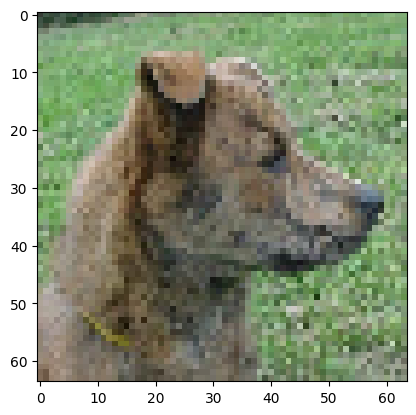

In [9]:
import matplotlib.pyplot as plt


for i, 정답 in train_ds.take(1):
    print(i)
    print(정답)
    plt.imshow(i[1].numpy().astype('uint8'))
    plt.show()


## 모델생성

In [ ]:
# Input_shape = (64,64,3) 1:흑백,3:칼러
# Conv2D 몇개 사용? 필터사이즈?(3,3) CNN       
# MaxPooling2D 필터사이즈(2,2) 몇개 사용?  CNN  
# Dropout 얼마나?  CNN
# Flatten 어디에?  
# Dense는 몇개?  --> MLP
# 마지막 출력은 어떤형식? sigmoid? categori?

# summary

# compile

# fit  - callbacks? , 

In [11]:
model = tf.keras.Sequential([
        
    tf.keras.layers.Conv2D(32,(3,3), padding='same', activation = 'relu', input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3), padding='same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    ## MLP
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')      
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 16384)            

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
h1 = model.fit(train_ds,  validation_data = val_ds, batch_size=128, epochs=5)

Epoch 1/50
313/313 [==============================] - 11s 34ms/step - loss: 0.6325 - accuracy: 0.6234 - val_loss: 0.6690 - val_accuracy: 0.6050
Epoch 2/50
313/313 [==============================] - 11s 33ms/step - loss: 0.6017 - accuracy: 0.6562 - val_loss: 0.6801 - val_accuracy: 0.6072
Epoch 3/50
313/313 [==============================] - 11s 34ms/step - loss: 0.5733 - accuracy: 0.6838 - val_loss: 0.6786 - val_accuracy: 0.6226
Epoch 4/50
313/313 [==============================] - 10s 32ms/step - loss: 0.5295 - accuracy: 0.7099 - val_loss: 0.7283 - val_accuracy: 0.6288
Epoch 5/50
313/313 [==============================] - 11s 33ms/step - loss: 0.4925 - accuracy: 0.7459 - val_loss: 0.7243 - val_accuracy: 0.6592
Epoch 6/50
313/313 [==============================] - 11s 34ms/step - loss: 0.4516 - accuracy: 0.7699 - val_loss: 0.8471 - val_accuracy: 0.6450
Epoch 7/50
313/313 [==============================] - 11s 35ms/step - loss: 0.4096 - accuracy: 0.8000 - val_loss: 0.8092 - val_accuracy:

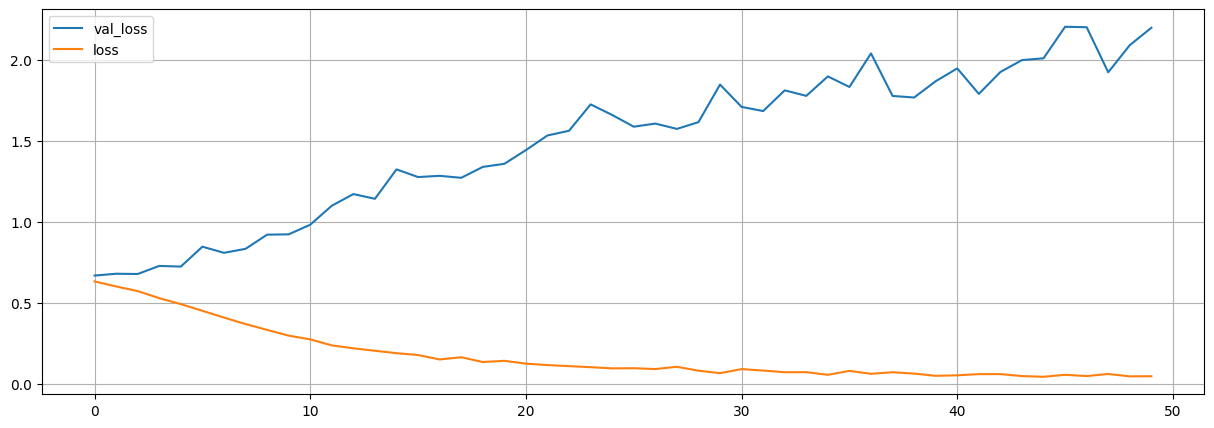

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

plt.plot(h1.history['val_loss'],
        label = 'val_loss')

plt.plot(h1.history['loss'],
        label = 'loss')

plt.legend()
plt.grid()
plt.show()

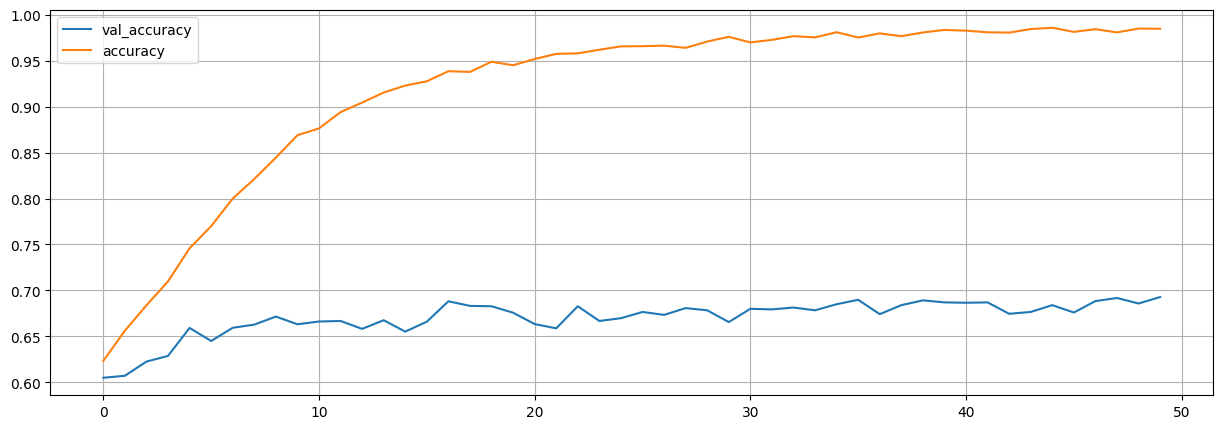

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

plt.plot(h1.history['val_accuracy'],
        label = 'val_accuracy')

plt.plot(h1.history['accuracy'],
        label = 'accuracy')

plt.legend()
plt.grid()
plt.show()

## 학습데이터 양을 늘리자[방법1]


In [22]:
import tensorflow
model2 = tf.keras.Sequential([
    ## 이미지 증량
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal' , input_shape=(64,64,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
    #####    
    tf.keras.layers.Conv2D(32,(3,3), padding='same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3), padding='same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    ## MLP
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')      
])

## 학습데이터 양을 늘리자[방법2]

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

생성기 = ImageDataGenerator(
    rescale = 1./ 255,
    rotation_range = 20, #회전
    zoom_range = 0.15, # 확대
    width_shift_range=0.2, # 이동
    height_shift_range=0.2, # 이동
    shear_range = 0.15, # 굴절
    horizontal_flip = True, # 가로 반전
    fill_mode = 'nearest') # 이동시 공백 채울때
## train, test
트레이닝용 = 생성기.flow_from_directory(
    '/content/dataset',
    class_mode = 'binary',  # categorical  두개 이상이면 categorical
    shuffle=True,
    seed=123,
    color_mode='rgb',
    batch_size=64,
    target_size=(64,64),    
)

생성기2 = ImageDataGenerator(rescale = 1./ 255)

검증용 = 생성기2.flow_from_directory(
    '/content/dataset',
    class_mode = 'binary',  # categorical  두개 이상이면 categorical
    shuffle=True,
    seed=123,
    color_mode='rgb',
    batch_size=64,
    target_size=(64,64),      
)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# trainingset = X_test,Y_test
model.fit(트레이닝용, validation_data = 검증용, epochs=5)

Found 25000 images belonging to 2 classes.
Found 25000 images belonging to 2 classes.
Epoch 1/5
391/391 [==============================] - 152s 386ms/step - loss: 0.9296 - accuracy: 0.5840 - val_loss: 0.6379 - val_accuracy: 0.6307
Epoch 2/5
391/391 [==============================] - 153s 391ms/step - loss: 0.6217 - accuracy: 0.6593 - val_loss: 0.5686 - val_accuracy: 0.7010
Epoch 3/5
391/391 [==============================] - 151s 386ms/step - loss: 0.5874 - accuracy: 0.6894 - val_loss: 0.5408 - val_accuracy: 0.7180
Epoch 4/5
391/391 [==============================] - 172s 439ms/step - loss: 0.5624 - accuracy: 0.7090 - val_loss: 0.5175 - val_accuracy: 0.7413
Epoch 5/5
391/391 [==============================] - 154s 393ms/step - loss: 0.5439 - accuracy: 0.7222 - val_loss: 0.4899 - val_accuracy: 0.7615


In [31]:
## 모델저장
model.save('/content/모델/model1')
# h5, hdf5

## W값만 저장하기

In [32]:
콜백함수 = tf.keras.callbacks.ModelCheckpoint(
    filepath='체크포인트/chk_point',
    save_weights_only= True,
    save_freq='epoch'    
)


In [33]:
# 모델 불러오기
save_model = tf.keras.models.load_model('/content/모델/model1')
save_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 16384)            

In [37]:
# evaluate[loss, accuracy]
save_model.evaluate(검증용)[1]

391/391 [==============================] - 66s 169ms/step - loss: 0.4899 - accuracy: 0.7615


0.7614799737930298

In [30]:
'''
dataset/cat
dataset/dog
val_dataset/cat
val_dataset/dog
'''

import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))



plt.plot(model.model.history['loss'],
        label = 'loss')

plt.legend()
plt.grid()
plt.show()


AttributeError: ignored

<Figure size 1500x500 with 0 Axes>